In [ ]:
import numpy as np
import pandas as pd

data = [120, 125, 128, 122, 126, 124, 600]

df = pd.DataFrame({'HousePrice' : data})

# Mean of house price
meanHouse = df['HousePrice'].mean()
print(f"Mean of House Price {round(meanHouse, 2)}")

# median of house price
medianHouse = df['HousePrice'].median()
print(f"Median of house price {round(medianHouse, 2)}")

# standard deviation of house price
stdHouse = df['HousePrice'].std()
print(f"Std of house price {round(stdHouse, 2)}")


Mean of House Price 192.14
Median of house price 125.0
Std of house price 179.87


In [ ]:
data2 = ['Dhaka', 'Chattogram', 'Sylhet', 'Khulna', 'Dinajpur', 'Dhaka', 'Sylhet', 'Dhaka', 'Sylhet']
city = pd.DataFrame({"cities" : data2})

modeCity = city['cities'].mode()[1]
print(f"Mode of Cities {modeCity}")



Mode of Cities Sylhet


###Veriance and Standard Deviation

In [ ]:
data = [120, 130, 125, 130, 140, 240, 250]

df = pd.DataFrame({"Purchase" : data})

mean = np.mean(df['Purchase'])
# mean1 = np.mean(df)

popVar = np.var(df['Purchase'], ddof=0)
simVar = np.var(df['Purchase'], ddof=1)

popStd = np.std(df['Purchase'], ddof=0)
simStd = np.std(df['Purchase'], ddof=1)



# mean
print(f'Mean {round(mean, 2)}')
print(f'Population Varience {round(popVar, 2)}')
print(f'Simple Varience {round(simVar, 2)}')
print(f'Population Standard deviation {round(popStd, 2)}')
print(f'Simple Standard deviation {round(simStd, 2)}')

Mean 162.14
Population Varience 2784.69
Simple Varience 3248.81
Population Standard deviation 52.77
Simple Standard deviation 57.0


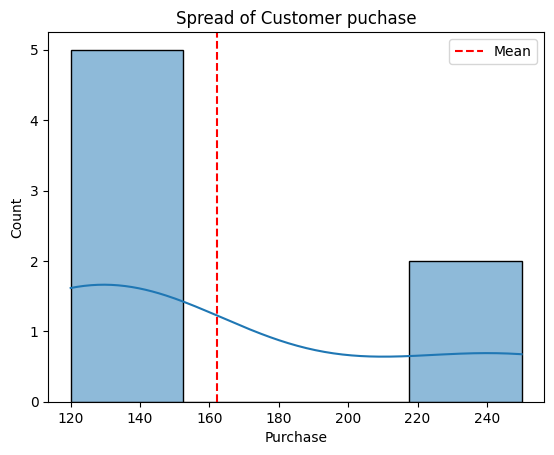

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.hist(df['Purchase'], label='ppp', color='red')

# plt.xlabel("Purchase")

# plt.legend()

# sns.kdeplot(data = df['Purchase'])

sns.histplot(df['Purchase'], kde=True)
plt.axvline(mean, linestyle='--', color='red', label='Mean')
plt.title("Spread of Customer puchase")
plt.legend()

plt.show()

###Percentiles Quartiles IQR

In [ ]:
Data = [-9, -12, 10, 12, 14, 15, 17, 18, 21, 23, 25, 27, 28, 31, 33, 35, 37, 38, 40, 60, 70]



q1 = np.percentile(Data, 25)
q2 = np.percentile(Data, 50)
q3 = np.percentile(Data, 75)

IQR = q3 - q1
mean = np.mean(Data)

lowerBound = q1 - (1.5*IQR)
upperBound = q3 + (1.5*IQR)

print(f"25% {q1}, 50% {q2} and 75% {q3}")
print(f"IQR value is {IQR}")
print(f"Outlier range is {lowerBound} to {upperBound}")




25% 15.0, 50% 25.0 and 75% 35.0
IQR value is 20.0
Outlier range is -15.0 to 65.0


###Outlier findout

In [ ]:
data = [-9, -12, 10, 12, 14, 15, 17, 18, 21, 23, 25, 27, 28, 31, 33, 35, 37, 38, 40, 60, 70]

df = pd.DataFrame({'income' : data})


outliers = df[(df['income'] < lowerBound) | (df['income'] > upperBound)]
print(f"Outliers using IQR and Quertiles {outliers}")


Outliers using IQR and Quertiles     income
20      70


###outlier using Z-index

In [ ]:
mean = df['income'].mean()
std = df['income'].std()

df['z-index'] = (df['income'] - mean) / std
outliers = df[np.abs(df['z-index']) > 2]
print(f"Outliers using Z-index {outliers}")

# df





Outliers using Z-index     income   z-index
20      70  2.340128


###Modified Z-index

In [ ]:
data = [10, 12, 14, 15, 17, 18, 21, 23, 25, 27, 28, 31, 33, 35, 37, 38, 40, 180, 185, 198]

df = pd.DataFrame({'income' : data})

median = df['income'].median()
mad = np.median(np.abs(df['income'] - median))
df['z-mad'] = 0.6745 * (df['income'] - median) / mad

outlierMad = df[np.abs(df['z-mad']) > 3.5]

print(f'Outlier using modified z-index \n{outlierMad}')





Outlier using modified z-index 
    income      z-mad
17     180  10.286125
18     185  10.623375
19     198  11.500225
